In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00


=== Base Circuit ===
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        └───┘┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─■──X──░──╫─┤M├
             └───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 
Measurement Counts (Base Circuit): {'11 00': 526, '00 00': 498}


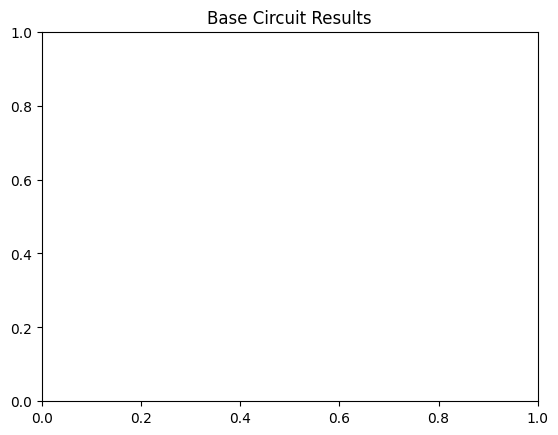


=== Task 1: Control / Target Variation ===
        ┌───┐┌───┐       ░ ┌─┐   
   q_0: ┤ H ├┤ X ├─■──X──░─┤M├───
        └───┘└─┬─┘ │  │  ░ └╥┘┌─┐
   q_1: ───────■───■──X──░──╫─┤M├
                         ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 
Measurement Counts (Control/Target Swapped): {'00 00': 524, '10 00': 500}


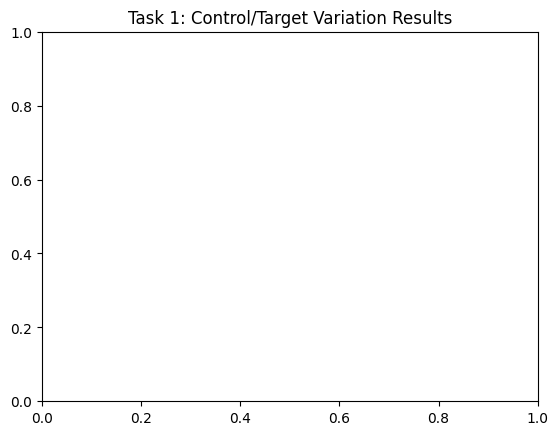


=== Task 2: Gate Removal (No SWAP) ===
        ┌───┐         ░ ┌─┐   
   q_0: ┤ H ├──■───■──░─┤M├───
        └───┘┌─┴─┐ │  ░ └╥┘┌─┐
   q_1: ─────┤ X ├─■──░──╫─┤M├
             └───┘    ░  ║ └╥┘
   c: 2/═════════════════╬══╬═
                         ║  ║ 
meas: 2/═════════════════╩══╩═
                         0  1 
Measurement Counts (Without SWAP): {'00 00': 548, '11 00': 476}


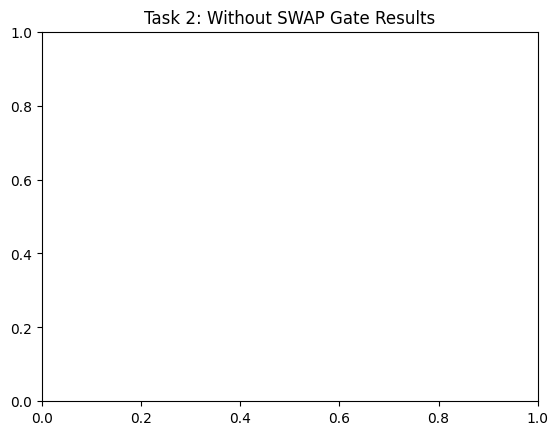


=== Task 3: Add Hadamard on Second Qubit ===
        ┌───┐            ░ ┌─┐   
   q_0: ┤ H ├──■───■──X──░─┤M├───
        ├───┤┌─┴─┐ │  │  ░ └╥┘┌─┐
   q_1: ┤ H ├┤ X ├─■──X──░──╫─┤M├
        └───┘└───┘       ░  ║ └╥┘
   c: 2/════════════════════╬══╬═
                            ║  ║ 
meas: 2/════════════════════╩══╩═
                            0  1 
Measurement Counts (Extra H on Qubit 1): {'01 00': 250, '00 00': 251, '11 00': 279, '10 00': 244}


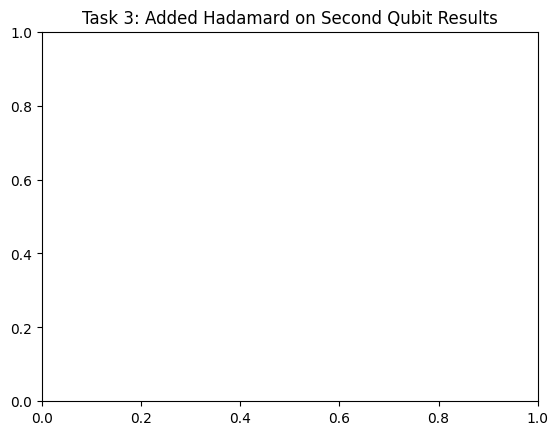

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Initialize simulator
sim = AerSimulator()

# ===============================================================
# Base Circuit
# ===============================================================
print("=== Base Circuit ===")

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.cz(0, 1)
qc.swap(0, 1)
qc.measure_all()

print(qc.draw())

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts_base = result.get_counts()

print("Measurement Counts (Base Circuit):", counts_base)
plot_histogram(counts_base)
plt.title("Base Circuit Results")
plt.show()


# ===============================================================
# Task 1: Control / Target Variation
# ===============================================================
print("\n=== Task 1: Control / Target Variation ===")

qc_var = QuantumCircuit(2, 2)
qc_var.h(0)
qc_var.cx(1, 0)   # swapped control and target
qc_var.cz(1, 0)   # swapped control and target
qc_var.swap(0, 1)
qc_var.measure_all()

print(qc_var.draw())

compiled_var = transpile(qc_var, sim)
result_var = sim.run(compiled_var, shots=1024).result()
counts_var = result_var.get_counts()

print("Measurement Counts (Control/Target Swapped):", counts_var)
plot_histogram(counts_var)
plt.title("Task 1: Control/Target Variation Results")
plt.show()

# Observation:
# Swapping control and target changes how entanglement and phase
# propagate through the system, leading to different measurement distributions.


# ===============================================================
# Task 2: Gate Removal (Remove SWAP)
# ===============================================================
print("\n=== Task 2: Gate Removal (No SWAP) ===")

qc_remove = QuantumCircuit(2, 2)
qc_remove.h(0)
qc_remove.cx(0, 1)
qc_remove.cz(0, 1)
# SWAP gate removed
qc_remove.measure_all()

print(qc_remove.draw())

compiled_remove = transpile(qc_remove, sim)
result_remove = sim.run(compiled_remove, shots=1024).result()
counts_remove = result_remove.get_counts()

print("Measurement Counts (Without SWAP):", counts_remove)
plot_histogram(counts_remove)
plt.title("Task 2: Without SWAP Gate Results")
plt.show()

# Observation:
# Removing the SWAP gate changes which qubit’s state ends up in which measurement line.


# ===============================================================
# Task 3: Add Another Hadamard on Second Qubit
# ===============================================================
print("\n=== Task 3: Add Hadamard on Second Qubit ===")

qc_h2 = QuantumCircuit(2, 2)
qc_h2.h(0)
qc_h2.h(1)        # extra Hadamard on qubit 1
qc_h2.cx(0, 1)
qc_h2.cz(0, 1)
qc_h2.swap(0, 1)
qc_h2.measure_all()

print(qc_h2.draw())

compiled_h2 = transpile(qc_h2, sim)
result_h2 = sim.run(compiled_h2, shots=1024).result()
counts_h2 = result_h2.get_counts()

print("Measurement Counts (Extra H on Qubit 1):", counts_h2)
plot_histogram(counts_h2)
plt.title("Task 3: Added Hadamard on Second Qubit Results")
plt.show()

# Observation:
# Adding a Hadamard to the second qubit introduces superposition,
# creating different interference patterns and a more uniform distribution of outcomes.

